In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [7]:
#loading dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocessing the data before training

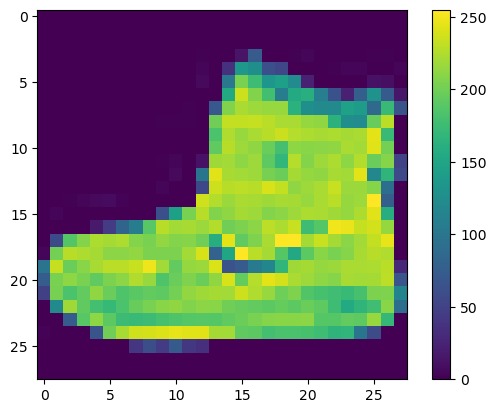

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
train_images = train_images / 255.0

test_images = test_images / 255.0

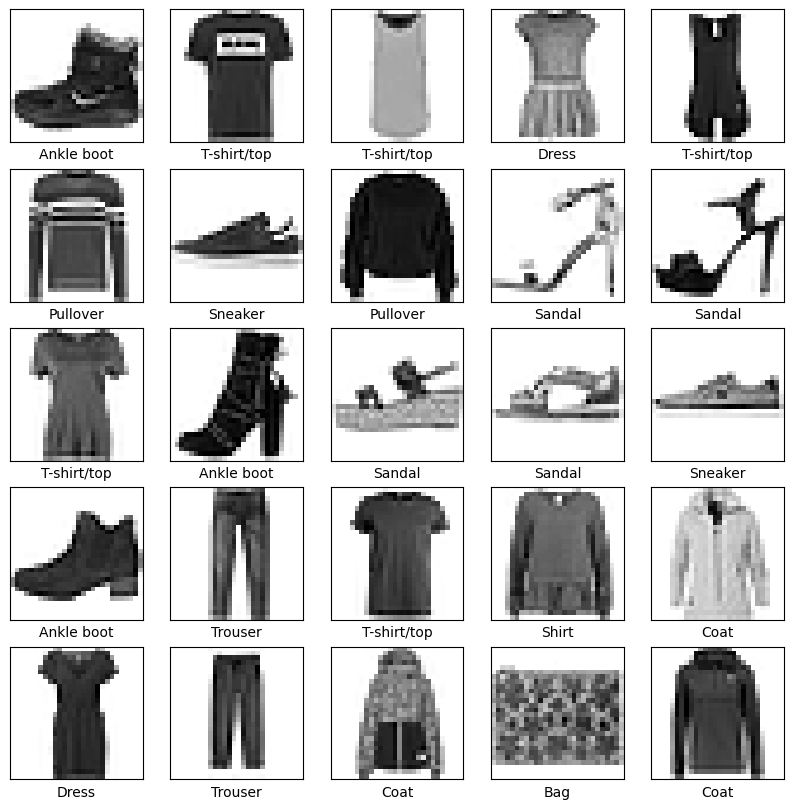

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building the model

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5056 - accuracy: 0.8228
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3760 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3364 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3123 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2942 - accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2795 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2676 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2560 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2470 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.237

### Finding the accuracy

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3461 - accuracy: 0.8808 - 719ms/epoch - 2ms/step

Test accuracy: 0.8808000087738037


### Making Predictions 

In [24]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([2.2632662e-06, 1.0794950e-08, 1.0185779e-07, 3.6296527e-10,
       2.4674801e-08, 2.8457325e-03, 3.7158253e-07, 5.3927019e-02,
       2.0251123e-07, 9.4322419e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [25]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verifying the predictions

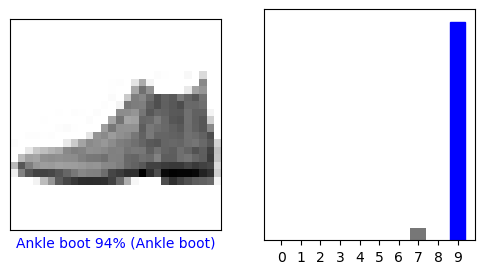

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

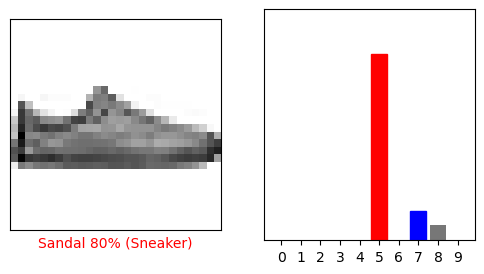

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

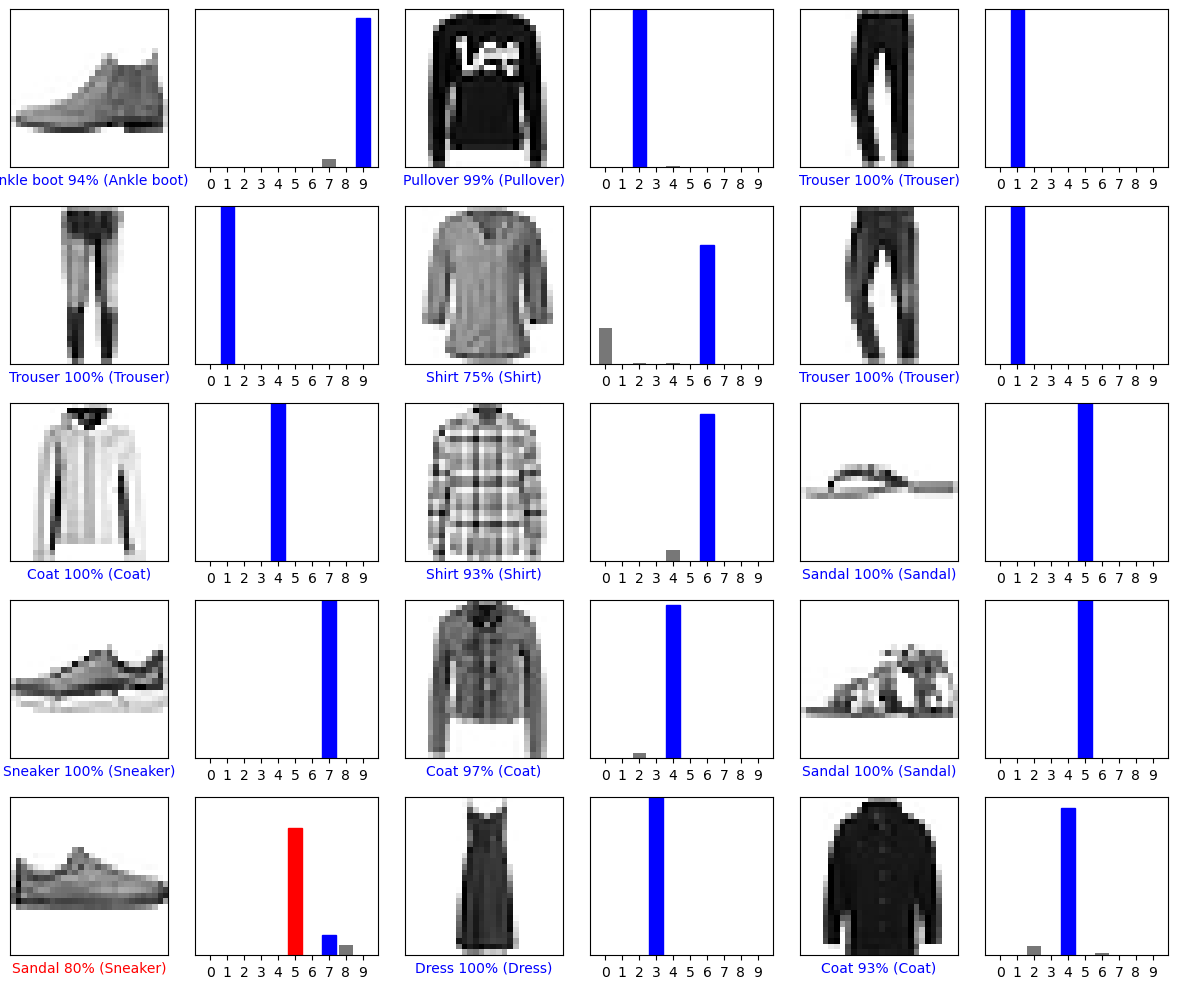

In [28]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [31]:
img = test_images[1]
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [32]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 29ms/step
[[1.2649031e-04 1.1930708e-13 9.9441445e-01 7.8833517e-15 5.4540676e-03
  8.8528091e-12 4.9587511e-06 2.1506715e-15 1.9477959e-09 3.8663576e-11]]


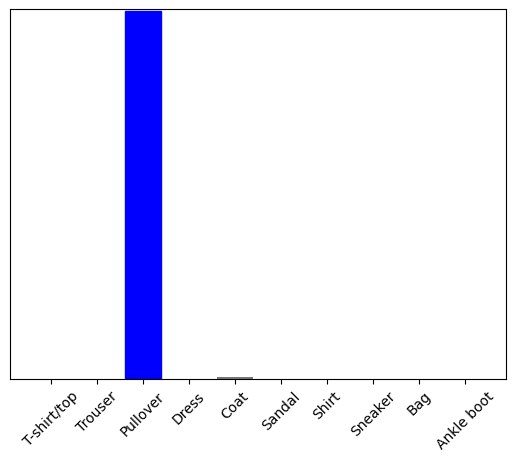

In [33]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()